In [3]:
#PART A) 

#let c represent e*E0/m in cm/s^2
#c = 1

#let w represent omega in s^-1
#w = 3

#it is given that a = -c*sin(wt) where t is time
#thus, v = (c/w)*cos(wt) + v_0
#assuming velocity is zero when time is zero,
#thus, v = (c/w)*cos(wt) - (c/w)

#integrating again gives x = (c/w^2)*sin(wt) - (c/w)t + x_0
#assuming the particle's position is zero when time is zero
#x = (c/w^2)*sin(wt) - (c/w)t

#at 2pi, the position is x = (1/3^2)*sin(3*2pi) - (1/3)*2pi = -2pi/3

The explicit solution gave: -2.0943951023931953
Doing it step-wise gave: -2.0785815947243873
The difference between the explicit and discrete solution is: 0.015813507668807958
The percent error is: 0.7550393739337143%


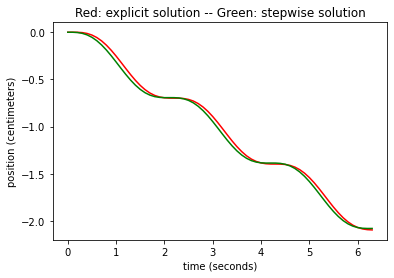

In [42]:
#PART B)
#like in the previous part, let c = 1 and w = 3
c = 1
w = 3

#we will use math.pi and math.sin so we import
import math

#this counts the number of timesteps we've done
steps = 0

#the length of each of these timesteps is 0.1 s
dt = 0.1

#this is the time when we stop -- in other words, we stop when dt * steps > T
T = 2 * math.pi

#these will store the velocity and positions
velocity = 0
position = 0

#this will store the position for each timestep
x = [0]

#this will store which timestep the position corresponds to
t = [0]

#this will store the position given by x = (1/9)*sin(3*2pi) - (1/3)t
exp_x = [0]

#our acceleration function given by the problem
def acceleration (time):
    return -c * math.sin(w * time)

#while the acceleration is still being applied (up until t = 2pi) we increment the velocity and position
while dt * steps <= T:
    #velocity is acceleration times dt for infintessimal steps in time dt
    velocity += acceleration(dt * steps) * dt
    
    #position is velocity times dt for infintessimal steps in time dt
    position += velocity * dt
    
    #append the new position to the position array
    x.append(position)
    exp_x.append((1/9)*math.sin(3*dt*steps) - (1/3)*dt*steps)
    
    #we move on to the next timestep
    steps += 1
    
    #we append the new timestep
    t.append(steps * dt)

#this prints the difference between our explicit vs discrete solutions
print("The explicit solution gave: " + str(-2 * math.pi / 3))
print("Doing it step-wise gave: " + str(position))
print("The difference between the explicit and discrete solution is: " + str(2 * math.pi / 3 + position))

#this finds and prints the error using error = (expected - observed) / (expected)
print("The percent error is: " + str(100 * (2 * math.pi / 3 + position)/(2 * math.pi / 3)) + "%")

#draws the graph
import matplotlib.pyplot as plt
fig = plt.figure()
sp = fig.add_subplot(1,1,1)
sp.plot(t, exp_x, 'r-')
sp.plot(t, x, 'g-')
sp.set(xlabel='time (seconds)', ylabel='position (centimeters)', title='Red: explicit solution -- Green: stepwise solution')
plt.show(sp)

The position at t = 2pi is: -0.03749705319968479
The position at t = 2pi without gradually increasing force was: -2.0785815947243873
The difference is: 2.0410845415247025


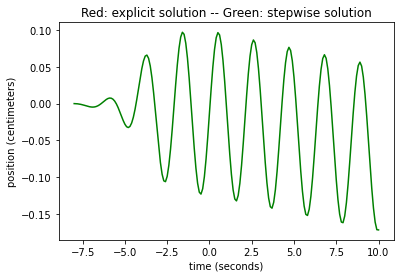

In [52]:
#PART C)

#again, we define these terms
c = 1
w = 3

#we must define the new acceleration
def acceleration (time):
    if time < -8:
        return 0
    if time < 0:
        return -c * math.pow(10, 0.5 * time) * math.sin(w * time) / (0.01 + math.pow(10, 0.5 * time))
    return -c * math.sin(w * time)

#now we run it from t = -8 to t = 10
#set up stuff
dt = 0.1
steps = 0
T_min = -8
T_max = 10
velocity = 0
position = 0
x = [0]
t = [-8]

#run the loop
while T_min + dt * steps < T_max:
    #increment velocity and position
    velocity += acceleration(T_min + dt * steps) * dt
    position += velocity * dt
    
    #add position so it can be graphed
    x.append(position)
    
    #at step 142, that's around when time = 6.2
    if steps == 142:
        print("The position at t = 2pi is: " + str(position))
        print("The position at t = 2pi without gradually increasing force was: -2.0785815947243873")
        print("The difference is: " + str(position + 2.0785815947243873))
    
    #increment steps and append the new timestep
    steps += 1
    t.append(T_min + dt * steps)
    
#draws the graph
import matplotlib.pyplot as plt
fig = plt.figure()
sp = fig.add_subplot(1,1,1)
sp.plot(t, x, 'g-')
sp.set(xlabel='time (seconds)', ylabel='position (centimeters)', title='Red: explicit solution -- Green: stepwise solution')
plt.show(sp)